5
3 4 2 5 1
Merge Sort Sorted 1 st Elements in 3.880600000005785e-05 s
Merge Sort Sorted 2 st Elements in 2.8609999999762437e-05 s
Merge Sort Sorted 3 st Elements in 2.5109000000078652e-05 s
Merge Sort Sorted 4 st Elements in 2.5715000000037236e-05 s
Merge Sort Sorted Elements in 0.042262527000000105 s
3 4 2 5 1
Quick Sort Sorted 1 st Elements in 1.8712999999781488e-05 s
Quick Sort Sorted 2 st Elements in 1.4036000000050564e-05 s
Quick Sort Sorted 3 st Elements in 1.9205000000077632e-05 s
Quick Sort Sorted 4 st Elements in 9.083000000131847e-06 s
Quick Sort Sorted Elements in 0.04830357400000018 s


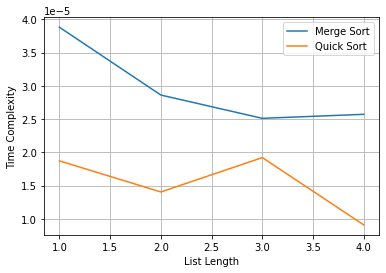

In [ ]:

import time
import numpy as np#array manipulation.
import matplotlib.pyplot as plt #data visulization in graphical model.


## Merge Sort ###########################
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r- m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0 , n1):
        L[i] = arr[l + i]

    for j in range(0 , n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray

    while i < n1 and j < n2 :
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# l is for left index and r is right index of the
# sub-array of arr to be sorted
def mergeSort(arr,l,r):
    if l < r:
        # Same as (l+r)/2, but avoids overflow for
        # large l and h
        m = l + (r-l)//2

        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)
#########################################

#########################################
## Quick Sort ###########################
def partition(arr,low,high):
    i = ( low-1 )         # index of smaller element
    pivot = arr[high]     # pivot

    for j in range(low , high):

        # If current element is smaller than or
        # equal to pivot
        if   arr[j] <= pivot:

            # increment index of smaller element
            i = i+1
            arr[i],arr[j] = arr[j],arr[i]

    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )

# Function to do Quick sort
def quickSort(arr,low,high):
    if low < high:
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr,low,high)

        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
#########################################




#########################################
## Main #################################

sorts = [
    {
        "name": "Merge Sort",
        "sort": lambda arr: mergeSort(arr, 0, len(arr) - 1)
    },
    {
        "name": "Quick Sort",
        "sort": lambda arr: quickSort(arr, 0, len(arr) - 1)
    }
]

n=int(input())
elements = np.array([i*1 for i in range(1, n)])
plt.xlabel('List Length')
plt.ylabel('Time Complexity')

for sort in sorts:
    times = list()
    start_all = time.process_time()
    a = list(map(int,input().split()))
    for i in range(1, len(a)):
        start = time.process_time()
        sort["sort"](a)
        end = time.process_time()
        times.append(end - start)
        print(sort["name"], "Sorted", i * 1, "st Elements in", end - start, "s")
    end_all = time.process_time()
    print(sort["name"], "Sorted Elements in", end_all - start_all, "s")
    plt.plot(elements, times, label = sort["name"])

plt.grid()
plt.legend()
plt.show()